In [96]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Chi-square test

  - dados numéricos e discretos
  - comparação de 2 ou mais distribuições
    - p.ex. número de escamas em alturas ou temperaturas diferentes 'versus' 2 ou mais regiões

### Colombia x America Central
  - 5 alturas diferentes 
  - coletar o número de escamas de cobras em 5 altitudes diferentes
  - os dados medidos são os "observados" que serão comparados com os dados "esperado"

In [97]:
# scales = observed data
scales = np.array([[16, 18, 16, 14, 12], [32, 24, 27, 35, 40]]).T
scales

array([[16, 32],
       [18, 24],
       [16, 27],
       [14, 35],
       [12, 40]])

In [98]:
chi2, p, dof, expected = stats.chi2_contingency(scales)

In [99]:
chi2, p, dof

(4.954749989486522, 0.2919720216859285, 4)

In [100]:
expected.round(2)

array([[15.59, 32.41],
       [13.64, 28.36],
       [13.97, 29.03],
       [15.91, 33.09],
       [16.89, 35.11]])

### Valores experados não se distanciam muito dos observados?

  - não: então as distribuições são similares:     H0  --> p-value < 0.05
  - sim: então as distribuições NÃO são similares: Ha --> p-value >= 0.05

In [101]:
if p >= 0.05:
    stri = "H0: similar distribuitions, statistic = %.3f, p-value = %.3e"%(chi2, p)
else:
    stri = "Ha: probably distinct distribuitions, statistic = %.3f, p-value = %.3e"%(chi2, p)    
stri

'H0: similar distribuitions, statistic = 4.955, p-value = 2.920e-01'

### Dados mais diferentes: distribuições distintas

In [102]:
# scales = observed data
scales = np.array([[16, 18, 16, 14, 12], [10, 24, 27, 35, 40]]).T
scales

array([[16, 10],
       [18, 24],
       [16, 27],
       [14, 35],
       [12, 40]])

In [103]:
scales.shape

(5, 2)

In [104]:
stat = stats.chisquare(scales, axis=None)
stat

Power_divergenceResult(statistic=43.0, pvalue=2.1556072340481466e-06)

In [105]:
chi2, p, dof, expected = stats.chi2_contingency(scales)

In [106]:
chi2, p, dof

(13.209586367265107, 0.010295849222450276, 4)

In [107]:
expected.round(1)

array([[ 9.3, 16.7],
       [15.1, 26.9],
       [15.4, 27.6],
       [17.6, 31.4],
       [18.6, 33.4]])

In [108]:
if p >= 0.05:
    stri = "H0: similar distribuitions, statistic = %.3f, p-value = %.3e"%(chi2, p)
else:
    stri = "Ha: probably distinct distribuitions, statistic = %.3f, p-value = %.3e"%(chi2, p)    
stri

'Ha: probably distinct distribuitions, statistic = 13.210, p-value = 1.030e-02'

### Distribution plot

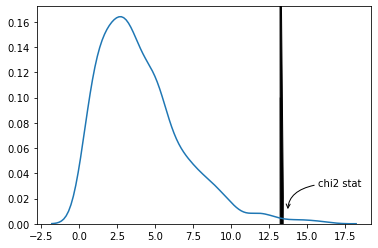

In [111]:
ax = sns.distplot(np.random.chisquare(df=dof, size=1000), hist=False);

ax.annotate('chi2 stat', xy=(chi2+.5, 0.01), xytext=(chi2+2.5, 0.03),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));


ax.arrow(chi2,                 # x start point
         0.0,                  # y start point
         0.01,                 # change in x 
         0.001,                # change in y
         head_width=0.6,       # arrow head width
         head_length=0.2,      # arrow head length
         width=0.2,            # arrow stem width
         fc='black',           # arrow fill color
         ec='black');          # arrow edge color

### 5 regions

In [17]:
scales = np.array([[16, 18, 16, 14, 10], 
                   [17, 19, 16, 13, 15],
                   [32, 24, 18, 11, 12],
                   [16, 18, 12, 16, 12],
                   [20, 18, 18, 16, 11]]).T
scales

array([[16, 17, 32, 16, 20],
       [18, 19, 24, 18, 18],
       [16, 16, 18, 12, 18],
       [14, 13, 11, 16, 16],
       [10, 15, 12, 12, 11]])

In [18]:
stat = stats.chisquare(scales, axis=None)
stat

Power_divergenceResult(statistic=31.338235294117645, pvalue=0.14426773613931348)

In [19]:
chi2, p, dof, expected = stats.chi2_contingency(scales)

In [22]:
print(scales.shape)
nrow, ncol = scales.shape
nrow, ncol 

(5, 5)


(5, 5)

In [24]:
"matrix = 5x5, degree of freedom(dof) = (n-1)*(c-1) = %d or %d"%( (nrow-1)*(ncol-1), dof)

'matrix = 5x5, degree of freedom(dof) = (n-1)*(c-1) = 16 or 16'

In [26]:
"statistic = %.3f, p-value = %.3e"%(chi2, p)

'statistic = 9.413, p-value = 8.954e-01'

In [27]:
expected

array([[18.31862745, 19.80392157, 24.0122549 , 18.31862745, 20.54656863],
       [17.59313725, 19.01960784, 23.06127451, 17.59313725, 19.73284314],
       [14.50980392, 15.68627451, 19.01960784, 14.50980392, 16.2745098 ],
       [12.69607843, 13.7254902 , 16.64215686, 12.69607843, 14.24019608],
       [10.88235294, 11.76470588, 14.26470588, 10.88235294, 12.20588235]])

### Simulating greph / plot

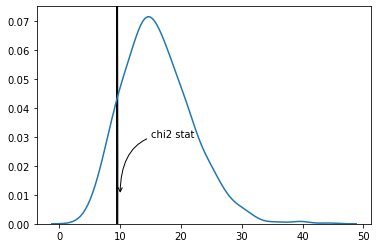

In [63]:
ax = sns.distplot(np.random.chisquare(df=dof, size=1000), hist=False);

ax.annotate('chi2 stat', xy=(10, 0.01), xytext=(15, 0.03),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));


ax.arrow(chi2,                 # x start point
         0.0,                  # y start point
         0.01,                 # change in x 
         0.001,                # change in y
         head_width=0.6,       # arrow head width
         head_length=0.2,      # arrow head length
         width=0.2,            # arrow stem width
         fc='black',           # arrow fill color
         ec='black');          # arrow edge color

### A normal continuous random variable

 - médida - mean - loc
 - var - scale

In [132]:
mean = 2
sdv = 4
N = 1000

samples = np.random.normal(size=1000, loc=mean, scale=sdv)

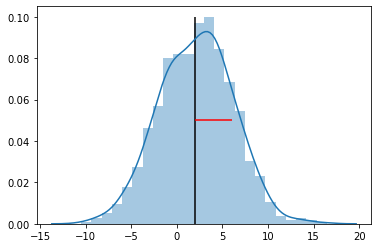

In [133]:
ax = sns.distplot(samples);
plt.vlines(mean, 0, 0.1, color = 'black');
plt.hlines(0.05, mean, mean+sdv, color = 'red');


## t-test